In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('test_data.csv')

In [3]:
df.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,"3208,440002","1163,521408","162,220001",64,"1381,310062","199,749999",79,"1527,013835","276,629998",83
1,2,north america,buyer_2,245542,6306,3401,2448,"1569,519999","833,059639","37,25",17,"1200,964697","69,340001",19,"1449,001828","120,250001",22
2,3,north america,buyer_1,1281103,35724,13315,8101,"1231,999998","459,6826","3,26",4,"524,987826","24,7",6,"572,633765","24,7",6
3,4,north america,buyer_1,215538,9987,3119,1857,"1228,129999","602,77816","26,13",11,"830,113889","33,439999",12,"1042,831595","57,530002",12
4,5,western europe,buyer_2,335878,7343,3952,2955,"872,570005","427,807238","19,030001",4,"577,039081","20,640001",5,"714,554179","32,150001",6


In [4]:
df.isna().sum()

Campaign_id          0
Geo                  0
Buyer                0
Impressions          0
Clicks               0
Installs             0
Registrations        0
Spend                0
Revenue_ad1d         0
Revenue_in_app1d     0
Payers1d             0
Revenue_ad7d         0
Revenue_in_app7d     0
Payers7d             0
Revenue_ad30d        0
Revenue_in_app30d    0
Payers30d            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Campaign_id        87 non-null     int64 
 1   Geo                87 non-null     object
 2   Buyer              87 non-null     object
 3   Impressions        87 non-null     int64 
 4   Clicks             87 non-null     int64 
 5   Installs           87 non-null     int64 
 6   Registrations      87 non-null     int64 
 7   Spend              87 non-null     object
 8   Revenue_ad1d       87 non-null     object
 9   Revenue_in_app1d   87 non-null     object
 10  Payers1d           87 non-null     int64 
 11  Revenue_ad7d       87 non-null     object
 12  Revenue_in_app7d   87 non-null     object
 13  Payers7d           87 non-null     int64 
 14  Revenue_ad30d      87 non-null     object
 15  Revenue_in_app30d  87 non-null     object
 16  Payers30d          87 non-null     int64 
dtyp

In [6]:
df.Spend             = df.Spend.str.replace(',', '.')
df.Revenue_ad1d      = df.Revenue_ad1d.str.replace(',', '.')
df.Revenue_in_app1d  = df.Revenue_in_app1d.str.replace(',', '.')
df.Revenue_ad7d      = df.Revenue_ad7d.str.replace(',', '.')
df.Revenue_in_app7d  = df.Revenue_in_app7d.str.replace(',', '.')
df.Revenue_ad30d     = df.Revenue_ad30d.str.replace(',', '.')
df.Revenue_in_app30d = df.Revenue_in_app30d.str.replace(',', '.')

In [7]:
df.Spend             = df.Spend.astype(float)
df.Revenue_ad1d      = df.Revenue_ad1d.astype(float)
df.Revenue_in_app1d  = df.Revenue_in_app1d.astype(float)
df.Revenue_ad7d      = df.Revenue_ad7d.astype(float)
df.Revenue_in_app7d  = df.Revenue_in_app7d.astype(float)
df.Revenue_ad30d     = df.Revenue_ad30d.astype(float)
df.Revenue_in_app30d = df.Revenue_in_app30d.astype(float)

In [8]:
#############################################################################

In [9]:
df['CPC'] = df.Spend       / df.Clicks

In [10]:
df['CTR'] = df.Impressions / df.Clicks

In [11]:
df['CAC'] = df.Spend       / df.Payers30d

In [12]:
df['CPI'] = df.Spend       / df.Installs

In [13]:
df['full_revenue_30d'] = df.Revenue_ad30d + df.Revenue_in_app30d

In [14]:
df['profit_30d']       = df.full_revenue_30d - df.Spend

###  GEO

In [36]:
df \
    .groupby(['Buyer', 'Geo']) \
    .agg({'full_revenue_30d': 'sum'}) \
    .sort_values('full_revenue_30d', ascending=False)

full_revenue_30d
Buyer   Geo                                
buyer_1 north america           3927.663948
buyer_2 north america           3755.242624
buyer_3 north america           2158.468897
buyer_2 western europe          1852.220803
buyer_4 north america            888.561318
buyer_2 cis                      376.937197
buyer_1 cis                      214.538815
        latin america            140.043132
buyer_5 western europe           110.589456
buyer_4 western europe            58.669494
buyer_5 north america             51.873324
        north africa              27.086440
        cis                       24.183706
buyer_4 cis                       15.312559
buyer_1 tropical africa            6.451855
buyer_5 australia oceania          1.212664

In [67]:
df \
    .groupby(['Buyer', 'Geo']) \
    .agg({'profit_30d': 'sum'}) \
    .sort_values(['Buyer', 'profit_30d'])

profit_30d
Buyer   Geo                           
buyer_1 north america     -2514.486054
        latin america      -216.486867
        cis                -156.421184
        tropical africa     -35.058145
buyer_2 north america      -722.837371
        cis                -339.592806
        western europe     -178.619195
buyer_3 north america       204.748888
buyer_4 north america      -141.438686
        cis                 -27.897442
        western europe       -9.190507
buyer_5 north africa       -220.803559
        north america       -89.446676
        western europe      -57.930544
        cis                 -37.576292
        australia oceania   -20.337335

### медиабайеры

In [68]:
df \
    .groupby('Buyer', as_index=False) \
    .agg({'profit_30d': 'sum'}) \
    .sort_values('profit_30d', ascending=False)

,Buyer,profit_30d
2,buyer_3,204.748888
3,buyer_4,-178.526635
4,buyer_5,-426.094406
1,buyer_2,-1241.049372
0,buyer_1,-2922.452250


,Buyer,CPC
1,buyer_2,5.695467
3,buyer_4,2.706596
4,buyer_5,1.436267
0,buyer_1,1.273572
2,buyer_3,1.149203


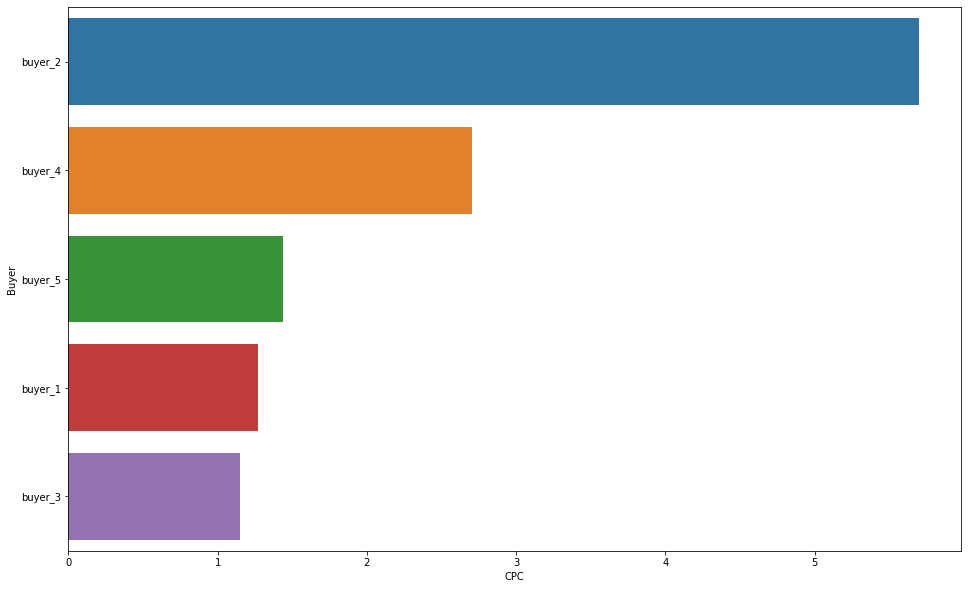

In [56]:
df_cpc = df \
    .groupby('Buyer', as_index=False) \
    .agg({'CPC': 'sum'}) \
    .sort_values('CPC', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(x='CPC', y='Buyer', data=df_cpc)
df_cpc

,Buyer,CTR
1,buyer_2,1527.260108
3,buyer_4,759.748939
0,buyer_1,565.450385
4,buyer_5,360.182468
2,buyer_3,181.161475


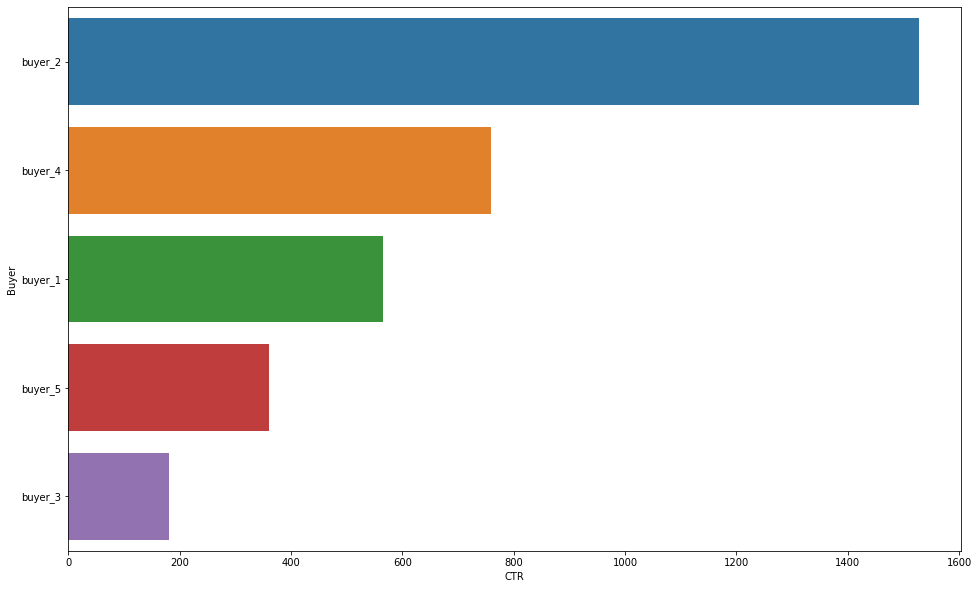

In [60]:
df_ctr = df \
    .groupby('Buyer', as_index=False) \
    .agg({'CTR': 'sum'}) \
    .sort_values('CTR', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(x='CTR', y='Buyer', data=df_ctr)
df_ctr

,Buyer,CAC
1,buyer_2,1555.246485
0,buyer_1,713.165403
2,buyer_3,525.639003
3,buyer_4,435.870003
4,buyer_5,106.339998


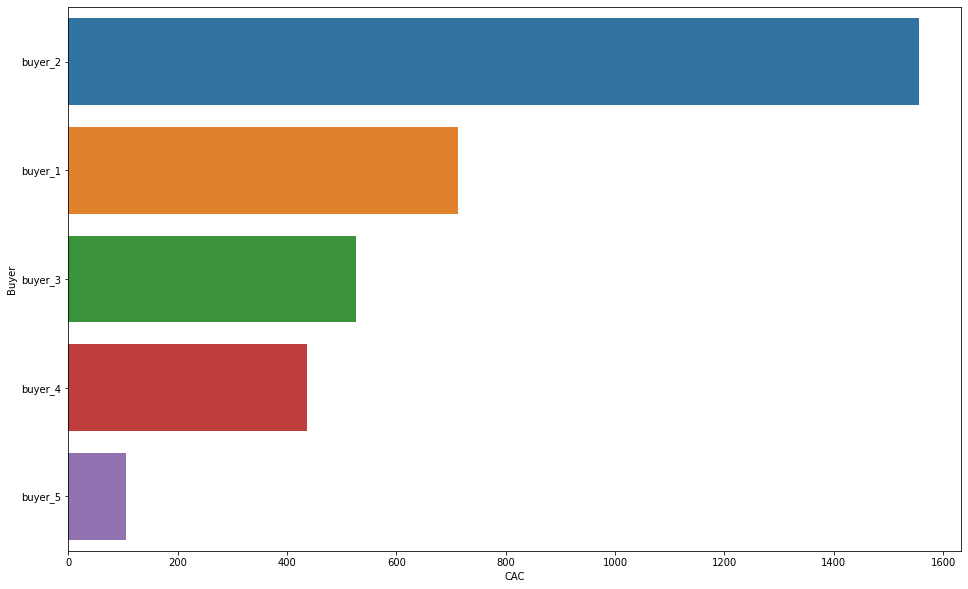

In [63]:
df_cac = df \
    .query("CAC != 'inf'") \
    .groupby('Buyer', as_index=False) \
    .agg({'CAC': 'sum'}) \
    .sort_values('CAC', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(x='CAC', y='Buyer', data=df_cac)
df_cac

,Buyer,CPI
1,buyer_2,13.154428
3,buyer_4,6.687403
4,buyer_5,4.373291
0,buyer_1,3.818497
2,buyer_3,3.224899


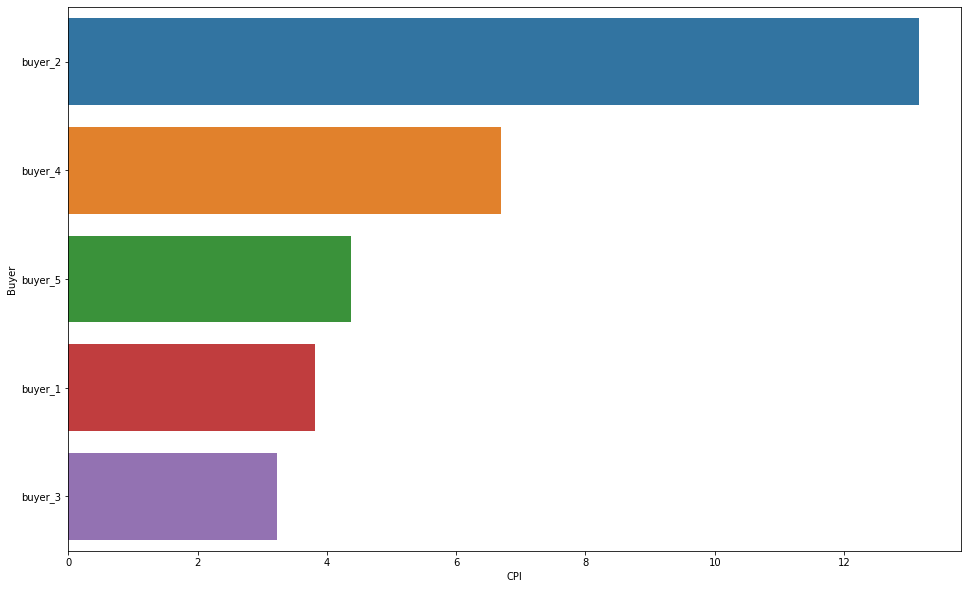

In [65]:
df_cpi = df \
    .groupby('Buyer', as_index=False) \
    .agg({'CPI': 'sum'}) \
    .sort_values('CPI', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(x='CPI', y='Buyer', data=df_cpi)
df_cpi